## Task 1

In this task we needed to make an extension of the existing __run_random_circuit.jl__ to support the extraction of the〈$x$|$\psi$〉for each bitstring *x* from the Matrix Product State. Squared magnitude is given as $P(x)$ =|〈$x$|$\psi$〉$|^2$ and we need to create a plot that maps the probability of each $x$ using a dot whose area is proportional to $P(x)$, for several circuit widths and depths.

We are going to import a small library we made for this project.

In [1]:
include("task_functions.jl")

runcirc_multiple (generic function with 1 method)

We present the modified __run_random_circuit__ function. We added a new parameter: __flipon__, it flags the occurance of a bit flip.

In [2]:
function run(N, depth, flipon)
    # Random circuit.
    gates = Vector{Tuple}[]
    if flipon == true
        td = rand(1 : depth)
        tN = rand(1 : N)
    end
    for i in 1:depth
        one_qubit_layer = Tuple[]
        two_qubit_layer = Tuple[]

        for j in 1:N
            gate = ("R", j, (theta = 2pi * rand(), phi = 2pi * rand()))
            push!(one_qubit_layer, gate)
            if flipon == true
                if j == tN && i == td
                    push!(one_qubit_layer, ("X", j))
                end
            end
        end

        # Alternate start qubit for pairs.
        idx_first = i % 2 + 1

        for j in idx_first:2:(N-1)
            gate = ("M", (j, j+1), (Theta=2pi*rand(),))
            push!(two_qubit_layer, gate)
        end

        push!(gates, one_qubit_layer)
        push!(gates, two_qubit_layer)

    end
    psi = runcircuit(N, gates)
end

run (generic function with 1 method)

We have written some code that runs our code on arbitrarily chosen parameters for __num_qubits__ and __depths__. On the graphic we can see that each such combination produces a speckle pattern of a different color.

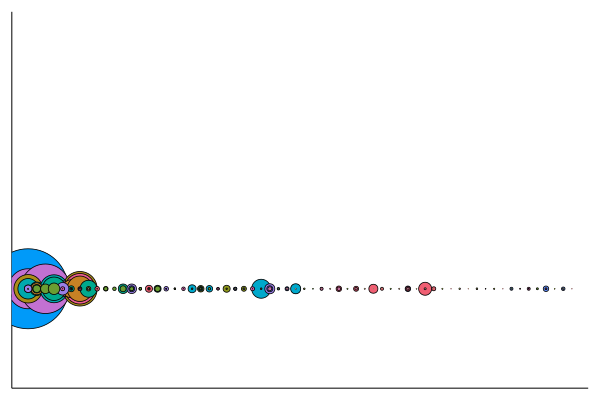

In [3]:
qubits   = [2,3,5,6]
depths   = [1,3,4,8]
bit_flip = false #bit flip flag on or off
pbs = Any[]
for qubit_n in qubits
    for depth_n in depths 
        psi = run(qubit_n, depth_n, bit_flip)
        pb  = get_Probs(psi, qubit_n)
        push!(pbs, pb)
        end
    end

for pb in pbs
    speckle = zeros(0)
    for i = 1:length(pb)
        append!(speckle,2.0)
        end
    scatter!(speckle, ms = 50 * pb, ylims = [1.5,3.5], legend = false, ticks = nothing)
    end

scatter!()

Additionally, we can take a look at the produced probabilities

In [4]:
pbs

16-element Vector{Any}:
 [0.8938700683140082, 0.004404790048593878, 0.1012263211623451, 0.0004988204750525685]
 [0.4044134309911595, 0.07594690101820423, 0.48020885218516624, 0.039430815805470684]
 [0.3914496000997343, 0.2176363235498898, 0.3281897848285828, 0.06272429152179264]
 [0.4465076167075145, 0.002239942504111821, 0.5502105840391477, 0.0010418567492270167]
 [0.3213011792844281, 8.697804872416554e-5, 0.10679856617635602, 2.891097665201851e-5, 0.18516916508534226, 5.012634158042914e-5, 0.38646045705271087, 0.00010461703420558549]
 [0.23076012974742288, 0.1507208203995942, 0.13507963370540194, 0.3140540280278201, 0.06025269298191918, 0.004215905144176562, 0.06502405698349917, 0.03989273301016663]
 [0.08882679252266781, 0.07568352451758702, 0.07102412546541852, 0.0504683927226214, 0.18123867044341996, 0.1725566758981337, 0.3430997460987609, 0.017102072331392913]
 [0.06208791149357172, 0.13535654908675307, 0.09738309325970688, 0.03825799657803763, 0.013377222453535433, 0.20233390442